For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?


- Ho = switching internet service has no bearing on latency
- Ha = switching internet service providers increases latency
- true positive = latency is increased with a different ISP - we reject HO
- true negative = latency isn't increased with a different ISP - fail to reject
- type 1 error = a false positive would be rejecting the HO when infact it is true
- type 2 error = a false negative would be failing to reject HO when infact it is false

Is the website redesign any good?


- Ho = the surveyed indicate no preference between the old a new websites redesign
- Ha = a recent survey of users indicates a positive sentiment to the website redesign
- true positive = sentiment is increased with a redesigned website - we reject HO
- true negative = sentiment isn't increased with a redesigned website - fail to reject
- type 1 error = a false positive would be rejecting the HO when infact it is true
- type 2 error = a false negative would be failing to reject HO when infact it is false

Is our television ad driving more sales?

- Ho = sales have experienced no change since the recent ad campaign
- Ha = sales have increased since the recent ad campaign
- true positive = ad campaign is positively affecting sales - we reject HO
- true negative = ad campaign isn't positively affecting sales - fail to reject
- type 1 error = a false positive would be rejecting the HO when infact it is true
- type 2 error = a false negative would be failing to reject HO when infact it is false

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

Answer with the type of test you would use (assume normal distribution):

Is there a difference in grades of students on the second floor compared to grades of all students?


    - two-tailed test, one sample


Are adults who drink milk taller than adults who dont drink milk?


    - one-tailed test, two sample


Is the the price of gas higher in texas or in new mexico?


    - one-tailed test, two sample


Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

    - ANOVA, two-tailed test

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

$H_{0}$ : there is no difference in the average time it takes to sell a home between the two offices

$H_{a}$ : there is difference in the average time it takes to sell a home between the two offices

In [2]:
alpha = 0.05

In [3]:
sample_size_office1 = 40
sample_size_office2 = 50
sample_office1_mean = 90
sample_office2_mean = 100
sample_office1_std = 15
sample_office2_std = 20
sample_office1_var = 15**2
sample_office2_var = 20**2

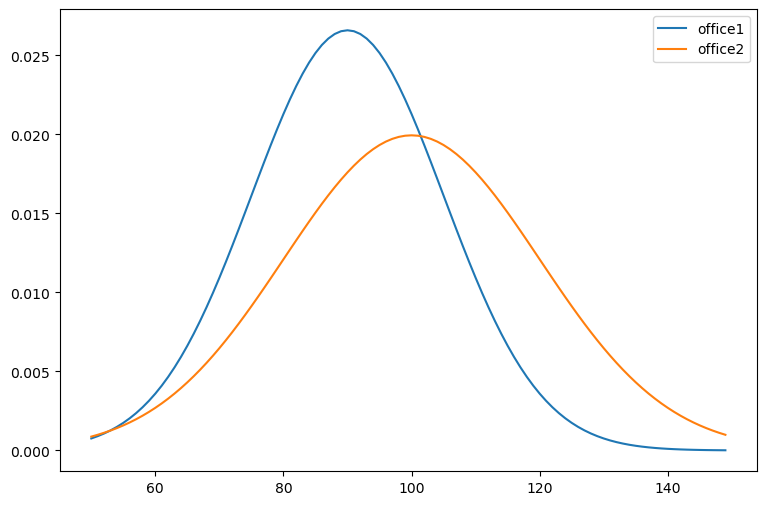

In [4]:
#Andrew's example
x = np.arange(50,150)
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.figure(figsize=(9,6))
plt.plot(x,y1, label = 'office1')
plt.plot(x,y2, label = 'office2')
plt.legend()

In [5]:
office_1=stats.norm(90,15).rvs(40)
office_2=stats.norm(100,20).rvs(50)

In [6]:
office_1.var(), office_2.var()

(116.50275385664686, 424.9850460632833)

In [7]:
stat, p_val = stats.levene(office_1, office_2)
stat, p_val

(14.434014312639556, 0.00026670396686952885)

In [8]:
t_stat, p_val = stats.ttest_ind(office_1, office_2, equal_var = False)
t_stat, p_val

(-2.028237461765752, 0.04599096506257865)

In [9]:
if p_val < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


- mine below

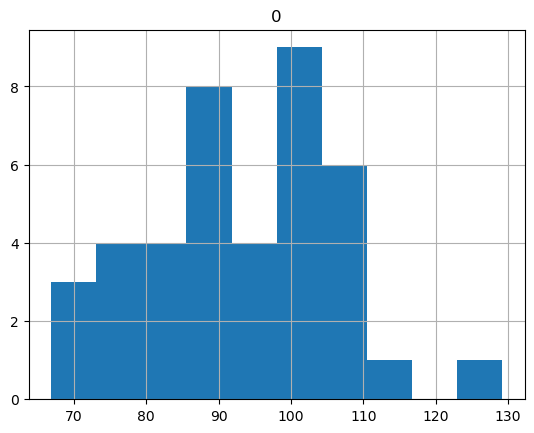

In [10]:
office1_df = pd.DataFrame(np.random.normal(sample_office1_mean, sample_office1_std, sample_size_office1))
office1_df.hist()
plt.show()

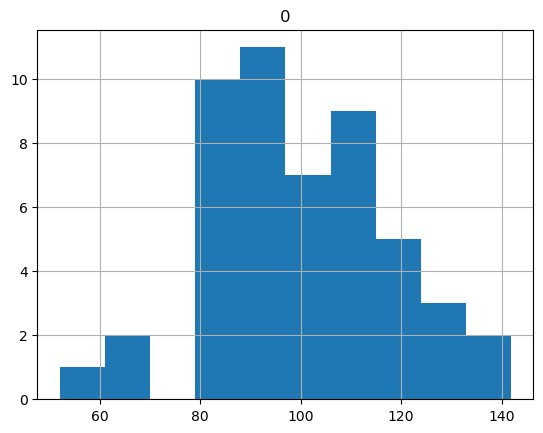

In [11]:
office2_df = pd.DataFrame(np.random.normal(sample_office2_mean, sample_office2_std, sample_size_office2))
office2_df.hist()
plt.show()


In [12]:
office2_df

,0
0,112.586913
1,101.404847
2,111.688141
3,90.144682
4,90.752394
5,107.794901
6,141.847936
7,108.667511
8,98.602535
9,116.307979


In [13]:
print(office1_df.var())
print(office2_df.var())

0    174.653511
dtype: float64
0    314.33825
dtype: float64


In [14]:
t, p = stats.ttest_ind(office1_df, office2_df, equal_var=False)
t, p 

(array([-2.27276402]), array([0.02548714]))

In [15]:
if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


 -

In [16]:
from pydataset import data

In [17]:
mpg = data('mpg')

In [18]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


$H_{0}$ : there is no difference in fuel efficiency between cars from 2008 vs. 1999

$H_{a}$ : there is a difference in fuel efficiency between cars from 2008 vs. 1999

In [19]:
mpg['average_mileage'] = (mpg.cty + mpg.hwy)/2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [20]:
older_car = mpg[mpg.year == 1999]
older_car

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5
12,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact,20.0
13,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact,21.0
16,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,19.5
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv,15.0


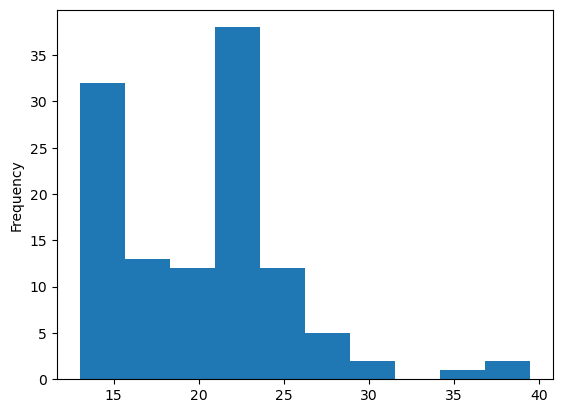

In [21]:
older_car.average_mileage.plot.hist()
plt.show()

In [22]:
older_car.average_mileage.mean()

20.22222222222222

In [23]:
newer_car = mpg[mpg.year == 2008]
newer_car

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact,23.0
14,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact,21.0
15,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact,20.0
17,audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize,21.0
18,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,p,midsize,19.5
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,17.0


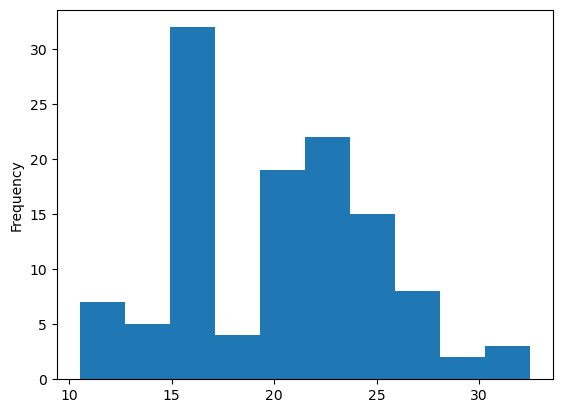

In [24]:
newer_car.average_mileage.plot.hist()
plt.show()

In [25]:
newer_car.average_mileage.mean()

20.076923076923077

In [26]:
print(older_car.average_mileage.var())
print(newer_car.average_mileage.var())

27.122605363984682
24.097480106100797


In [27]:
stat, pval = stats.levene(older_car.average_mileage, newer_car.average_mileage)
stat, pval

(0.033228136671080453, 0.855517569468803)

In [28]:
if pval < alpha:
    print("Levene's test found a significant result which means our variances are NOT equal")
else:
    print("our variances are equal")

our variances are equal


In [29]:
t, p = stats.ttest_ind(older_car.average_mileage, newer_car.average_mileage, equal_var = True)
t, p

(0.21960177245940962, 0.8263744040323578)

In [30]:
if p < alpha:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


Are compact cars more fuel-efficient than the average car?


$H_{0}$: compact cars are no different than the average car in terms of fuel efficiency

$𝐻_{𝑎}$: compact cars are more fuel efficient than the average car

In [31]:
compact = mpg[mpg['class'] == 'compact']['average_mileage']
compact

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
6      22.0
7      22.5
8      22.0
9      20.5
10     24.0
11     23.0
12     20.0
13     21.0
14     21.0
15     20.0
142    25.0
143    23.0
170    22.5
171    23.5
172    22.0
173    23.5
187    24.0
188    25.0
189    26.0
190    26.5
191    22.0
192    22.0
193    22.5
194    27.0
195    28.5
196    30.5
197    32.5
198    30.5
208    25.0
209    22.5
210    25.0
211    25.5
212    20.5
213    38.5
214    25.0
215    22.5
216    25.5
217    25.0
218    25.0
219    25.0
220    19.5
221    20.5
Name: average_mileage, dtype: float64

<AxesSubplot:>

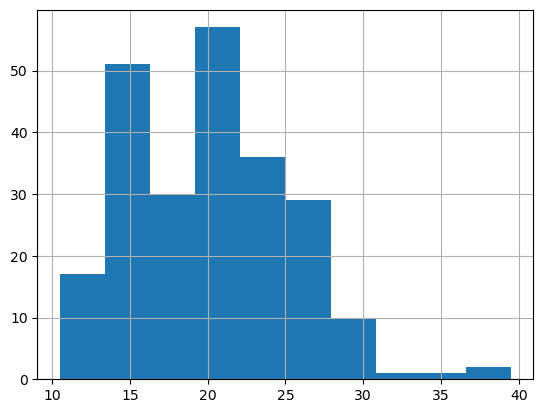

In [34]:
mpg.average_mileage.hist()

In [35]:
t, p = stats.ttest_1samp(compact, mpg.average_mileage.mean())
t, p /2

(7.896888573132533, 2.0992818971585816e-10)

In [36]:
if (p/2 < alpha) and (t>0):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis



Do manual cars get better gas mileage than automatic cars?

Do manual cars get better gas mileage than automatic cars

$H_{0}$: manual cars are no different than an automatic car in terms of fuel efficiency

$𝐻_{𝑎}$: manual cars are more fuel efficient than an automatic car

In [39]:
mpg_manual = mpg[mpg['trans'].str.contains('manual')]


<AxesSubplot:>

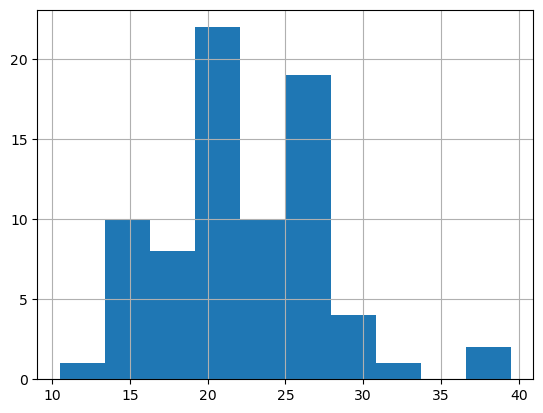

In [40]:
mpg_manual.average_mileage.hist()

In [41]:
mpg_auto = mpg[mpg['trans'].str.contains('auto')]

<AxesSubplot:>

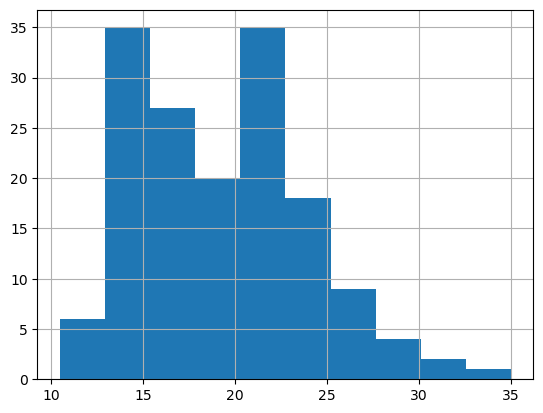

In [42]:
mpg_auto.average_mileage.hist()

In [43]:
print(mpg_manual.average_mileage.var())
print(mpg_auto.average_mileage.var())

26.635167464114826
21.942777233382337


In [44]:
stat, pval = stats.levene(mpg_manual.average_mileage, mpg_auto.average_mileage)
stat, pval

(0.20075824847529639, 0.6545276355131857)

In [45]:
if pval < alpha:
    print("Levene's test found a significant result which means our variances are NOT equal")
else:
    print("our variances are equal")

our variances are equal


In [46]:
t, p = stats.ttest_ind( mpg_manual.average_mileage, mpg_auto.average_mileage, equal_var = True )
t, p/2

(4.593437735750014, 3.5771872005728416e-06)

In [47]:
if p/2 < alpha:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


# Correlation

# Answer with the type of stats test you would use (assume normal distribution):


Is there a relationship between the length of your arm and the length of your foot?


> continuous, pearsonr

Do guys and gals quit their jobs at the same rate?


> categorical and continuous, 2 tailed - ttest


Does the length of time of the lecture correlate with a students grade?

> continuous, pearsonr

Use the telco_churn data.


In [48]:
from env import host_name, user, password

In [49]:
def get_db_url(database):
    url = f'mysql+pymysql://{user}:{password}@{host_name}/{database}'
    return url

In [50]:
url = get_db_url('telco_churn')

Does tenure correlate with monthly charges?

In [51]:
df = pd.read_sql('select tenure, monthly_charges from customers', url)
df

,tenure,monthly_charges
0,9,65.60
1,9,59.90
2,4,73.90
3,13,98.00
4,3,83.90
...,...,...
7038,13,55.15
7039,22,85.10
7040,2,50.30
7041,67,67.85


In [52]:
df.tenure.head()

0     9
1     9
2     4
3    13
4     3
Name: tenure, dtype: int64

In [53]:
df.monthly_charges.head()

0    65.6
1    59.9
2    73.9
3    98.0
4    83.9
Name: monthly_charges, dtype: float64

𝐻0
 : there is no linear relationship between tenure and monthly charges

𝐻𝑎
 : there is a linear relationship between tenure and monthly charges

In [54]:
alpha = 0.05

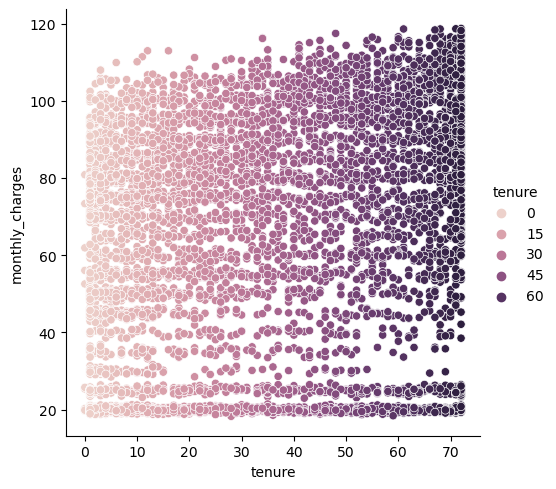

In [249]:
sns.relplot(data=df, x='tenure', y='monthly_charges', hue='tenure')
plt.show()

In [56]:
r,p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

(0.24789985628615008, 4.0940449915016345e-99)

In [57]:
#output results
print('r =', r)
print('p =', p)

r = 0.24789985628615008
p = 4.0940449915016345e-99


In [58]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Total charges?

 $H_o$: there is no correlation between tenure and total charges
 
 $H_a$: there is a correlation between tenure and total charges

In [59]:
df1 = pd.read_sql('select tenure, total_charges from customers', url)
df1

,tenure,total_charges
0,9,593.3
1,9,542.4
2,4,280.85
3,13,1237.85
4,3,267.4
...,...,...
7038,13,742.9
7039,22,1873.7
7040,2,92.75
7041,67,4627.65


In [60]:
df1.tenure.head()

0     9
1     9
2     4
3    13
4     3
Name: tenure, dtype: int64

In [61]:
df1.total_charges.head()

0      593.3
1      542.4
2     280.85
3    1237.85
4      267.4
Name: total_charges, dtype: object

𝐻0 : there is no linear relationship between tenure and total charges

𝐻𝑎 : there is a linear relationship between tenure and total charges

In [62]:
alpha = 0.05

In [79]:
df1 = df1.replace(' ','0').astype(float)

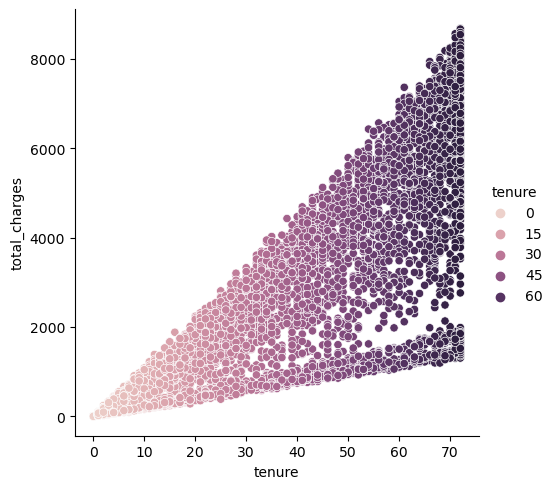

In [80]:
sns.relplot(data=df1, x='tenure', y='total_charges', hue='tenure')
plt.show()

In [81]:
r,p = stats.pearsonr(df1.tenure, df1.total_charges)
r, p

(0.826178397950242, 0.0)

In [82]:
#output results
print('r =', r)
print('p =', p)

r = 0.826178397950242
p = 0.0


In [83]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


What happens if you control for phone and internet service?

 $H_o$: there is no correlation between tenure/total charges where phone and internet services change the outcome
 
 $H_a$: there is a correlation between tenure/total charges where phone and interenet services change the outcome

In [97]:
df2 = pd.read_sql('select tenure, total_charges, phone_service from customers', url)
df2

,tenure,total_charges,phone_service
0,9,593.3,Yes
1,9,542.4,Yes
2,4,280.85,Yes
3,13,1237.85,Yes
4,3,267.4,Yes
...,...,...,...
7038,13,742.9,Yes
7039,22,1873.7,Yes
7040,2,92.75,Yes
7041,67,4627.65,Yes


In [108]:
df2 = df2.replace(' ','0').replace('Yes','1').replace('No','0').astype(float)
df2

,tenure,total_charges,phone_service
0,9.0,593.30,1.0
1,9.0,542.40,1.0
2,4.0,280.85,1.0
3,13.0,1237.85,1.0
4,3.0,267.40,1.0
...,...,...,...
7038,13.0,742.90,1.0
7039,22.0,1873.70,1.0
7040,2.0,92.75,1.0
7041,67.0,4627.65,1.0


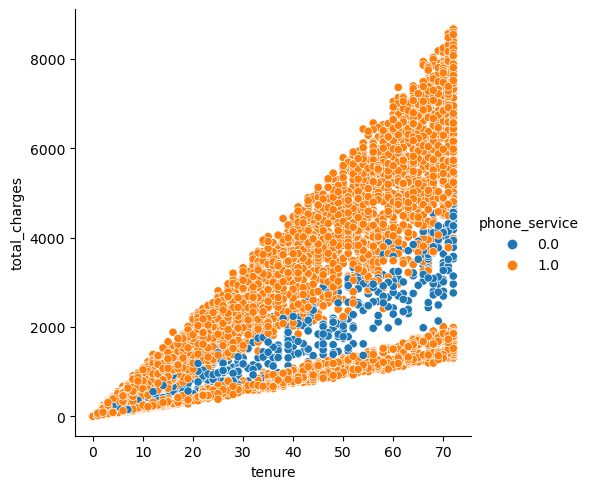

In [145]:
sns.relplot(data=df2, x='tenure', y='total_charges', hue='phone_service')
plt.show()

In [183]:
phone_no = df2[df2.phone_service == 0.0]
phone_no

,tenure,total_charges,phone_service
10,54.0,2460.55,0.0
14,56.0,2560.10,0.0
16,34.0,1993.20,0.0
19,1.0,25.10,0.0
25,1.0,30.50,0.0
...,...,...,...
6979,65.0,3517.90,0.0
6980,1.0,25.05,0.0
6996,12.0,552.10,0.0
7016,69.0,4263.40,0.0


In [184]:
phone_yes = df2[df2.phone_service == 1.0]
phone_yes

,tenure,total_charges,phone_service
0,9.0,593.30,1.0
1,9.0,542.40,1.0
2,4.0,280.85,1.0
3,13.0,1237.85,1.0
4,3.0,267.40,1.0
...,...,...,...
7037,4.0,85.50,1.0
7038,13.0,742.90,1.0
7039,22.0,1873.70,1.0
7040,2.0,92.75,1.0


In [185]:
#internet yes vs. tenure
r, p = stats.pearsonr(phone_yes.tenure, phone_yes.total_charges)
print('internet yes')
print('  r =', r)
print('  p =', p)

internet yes
  r = 0.8301076972900363
  p = 0.0


In [186]:
#internet no vs. tenure
r, p = stats.pearsonr(phone_no.tenure, phone_no.total_charges)
print('internet no')
print('  r =', r)
print('  p =', p)

internet no
  r = 0.9535697728407464
  p = 0.0


In [182]:
# or categorical vs. continuous below

In [152]:
stat, pval = stats.levene(df2.tenure, df2.phone_service)
stat, pval

(23306.148309645774, 0.0)

In [153]:
if pval < alpha:
    print("Levene's test found a significant result which means our variances are NOT equal")
else:
    print("our variances are equal")

Levene's test found a significant result which means our variances are NOT equal


In [154]:
t, p = stats.ttest_ind(df2.tenure, df2.phone_service, equal_var = False)
t, p

(107.52193456658537, 0.0)

In [155]:
if (t>0) and ((p/2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


In [118]:
df3 = pd.read_sql('select tenure, total_charges, internet_service_type_id from customers', url)
df3

,tenure,total_charges,internet_service_type_id
0,9,593.3,1
1,9,542.4,1
2,4,280.85,2
3,13,1237.85,2
4,3,267.4,2
...,...,...,...
7038,13,742.9,1
7039,22,1873.7,2
7040,2,92.75,1
7041,67,4627.65,1


In [134]:
df3.internet_service_type_id = df3.internet_service_type_id.replace(1,'Yes').replace(2,'Yes').replace(3,'No')
df3

,tenure,total_charges,internet_service_type_id
0,9,593.3,Yes
1,9,542.4,Yes
2,4,280.85,Yes
3,13,1237.85,Yes
4,3,267.4,Yes
...,...,...,...
7038,13,742.9,Yes
7039,22,1873.7,Yes
7040,2,92.75,Yes
7041,67,4627.65,Yes


In [141]:
df3.internet_service_type_id = df3.internet_service_type_id.replace('Yes','1').replace('No','0').astype(float)
df3

,tenure,total_charges,internet_service_type_id
0,9,593.3,1.0
1,9,542.4,1.0
2,4,280.85,1.0
3,13,1237.85,1.0
4,3,267.4,1.0
...,...,...,...
7038,13,742.9,1.0
7039,22,1873.7,1.0
7040,2,92.75,1.0
7041,67,4627.65,1.0


In [148]:
df3 = df3.replace(' ','0').astype(float)

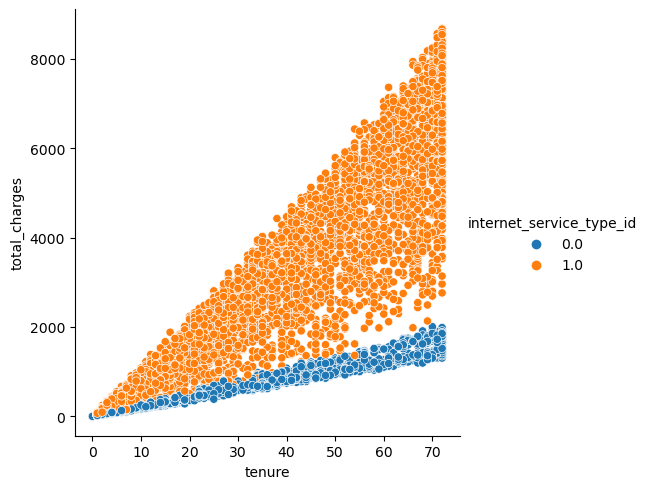

In [149]:
sns.relplot(data=df3, x='tenure', y='total_charges', hue='internet_service_type_id')
plt.show()

In [178]:
internet_no = df3[df3.internet_service_type_id == 0.0]
internet_no

,tenure,total_charges,internet_service_type_id
20,50.0,1306.30,0.0
23,3.0,57.20,0.0
24,4.0,76.35,0.0
27,54.0,1090.60,0.0
28,26.0,471.85,0.0
...,...,...,...
7026,6.0,129.55,0.0
7028,67.0,1372.90,0.0
7032,46.0,856.50,0.0
7033,1.0,18.90,0.0


In [175]:
internet_yes = df3[df3.internet_service_type_id == 1.0]
internet_yes

,tenure,total_charges,internet_service_type_id
0,9.0,593.30,1.0
1,9.0,542.40,1.0
2,4.0,280.85,1.0
3,13.0,1237.85,1.0
4,3.0,267.40,1.0
...,...,...,...
7038,13.0,742.90,1.0
7039,22.0,1873.70,1.0
7040,2.0,92.75,1.0
7041,67.0,4627.65,1.0


In [176]:
#internet yes vs. tenure
r, p = stats.pearsonr(internet_yes.tenure, internet_yes.total_charges)
print('internet yes')
print('  r =', r)
print('  p =', p)

internet yes
  r = 0.9320165580130639
  p = 0.0


In [180]:
#internet no vs. tenure
r, p = stats.pearsonr(internet_no.tenure, internet_no.total_charges)
print('internet no')
print('  r =', r)
print('  p =', p)

internet no
  r = 0.9815669784401058
  p = 0.0


In [181]:
#categorical vs. continuous below

In [156]:
stat, pval = stats.levene(df3.tenure, df3.internet_service_type_id)
stat, pval

(23035.473465774114, 0.0)

In [157]:
if pval < alpha:
    print("Levene's test found a significant result which means our variances are NOT equal")
else:
    print("our variances are equal")

Levene's test found a significant result which means our variances are NOT equal


In [158]:
t, p = stats.ttest_ind(df3.tenure, df3.internet_service_type_id, equal_var = False)
t, p

(107.92403627974718, 0.0)

In [159]:
if (t>0) and ((p/2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?


 $H_o$: there is no linear relationship between tenure and salary
 
 $H_a$: there is a linear relationship between tenure and salary

In [164]:
url = get_db_url('employees')

In [188]:
e_df = pd.read_sql('''SELECT e.emp_no, e.hire_date, s.salary, t.title, s.to_date
                            FROM employees e 
                            JOIN salaries s on e.emp_no = s.emp_no 
                            JOIN titles t on e.emp_no = t.emp_no
                            where s.to_date > Now()
                                and t.to_date > now(); ''', url)


In [197]:
e_df

,emp_no,hire_date,salary,title,to_date
0,10001,1986-06-26,88958,Senior Engineer,9999-01-01
1,10002,1985-11-21,72527,Staff,9999-01-01
2,10003,1986-08-28,43311,Senior Engineer,9999-01-01
3,10004,1986-12-01,74057,Senior Engineer,9999-01-01
4,10005,1989-09-12,94692,Senior Staff,9999-01-01
...,...,...,...,...,...
240119,499995,1993-01-12,52868,Engineer,9999-01-01
240120,499996,1990-09-27,69501,Senior Engineer,9999-01-01
240121,499997,1986-04-21,83441,Senior Engineer,9999-01-01
240122,499998,1993-10-13,55003,Senior Staff,9999-01-01


In [209]:
e_df.to_date = '2023-04-11'
e_df

,emp_no,hire_date,salary,title,to_date
0,10001,1986-06-26,88958,Senior Engineer,2023-04-11
1,10002,1985-11-21,72527,Staff,2023-04-11
2,10003,1986-08-28,43311,Senior Engineer,2023-04-11
3,10004,1986-12-01,74057,Senior Engineer,2023-04-11
4,10005,1989-09-12,94692,Senior Staff,2023-04-11
...,...,...,...,...,...
240119,499995,1993-01-12,52868,Engineer,2023-04-11
240120,499996,1990-09-27,69501,Senior Engineer,2023-04-11
240121,499997,1986-04-21,83441,Senior Engineer,2023-04-11
240122,499998,1993-10-13,55003,Senior Staff,2023-04-11


In [211]:
e_df.to_date = e_df.to_date.astype('datetime64')

In [212]:
e_df.hire_date = e_df.hire_date.astype('datetime64')

In [218]:
e_df['tenure_in_days'] = e_df.to_date - e_df.hire_date
e_df

,emp_no,hire_date,salary,title,to_date,tenure_in_days
0,10001,1986-06-26,88958,Senior Engineer,2023-04-11,13438 days
1,10002,1985-11-21,72527,Staff,2023-04-11,13655 days
2,10003,1986-08-28,43311,Senior Engineer,2023-04-11,13375 days
3,10004,1986-12-01,74057,Senior Engineer,2023-04-11,13280 days
4,10005,1989-09-12,94692,Senior Staff,2023-04-11,12264 days
...,...,...,...,...,...,...
240119,499995,1993-01-12,52868,Engineer,2023-04-11,11046 days
240120,499996,1990-09-27,69501,Senior Engineer,2023-04-11,11884 days
240121,499997,1986-04-21,83441,Senior Engineer,2023-04-11,13504 days
240122,499998,1993-10-13,55003,Senior Staff,2023-04-11,10772 days


In [227]:
e_df.tenure_in_days = e_df.tenure_in_days.dt.days

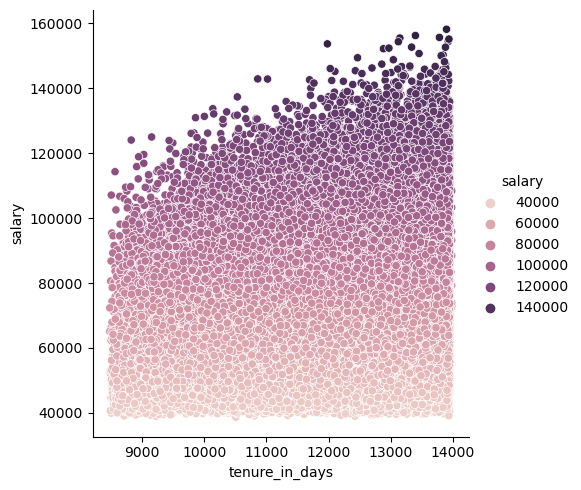

In [228]:
sns.relplot(data=e_df, x='tenure_in_days', y='salary', hue='salary')
plt.show()

In [229]:
r,p = stats.pearsonr(e_df.tenure_in_days, e_df.salary)
r, p

(0.3064625613186078, 0.0)

In [230]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Is there a relationship between how long an employee has been with the company and the number of titles they have had?

 $H_o$: there is no linear relationship between tenure and number of titles
 
 $H_a$: there is a linear relationship between tenure and number of titles

In [234]:
e_df2 = pd.read_sql('''select 
                        emp_no
                        , count(title) as number_of_titles
                        , round((datediff(now(),hire_date)) / 365, 2) as tenure
                        from employees
                        join titles using(emp_no)
                        group by emp_no; ''', url)

In [235]:
e_df2

,emp_no,number_of_titles,tenure
0,10001,1,36.82
1,10002,1,37.41
2,10003,1,36.64
3,10004,2,36.38
4,10005,2,33.60
...,...,...,...
300019,499995,1,30.26
300020,499996,2,32.56
300021,499997,2,37.00
300022,499998,2,29.51


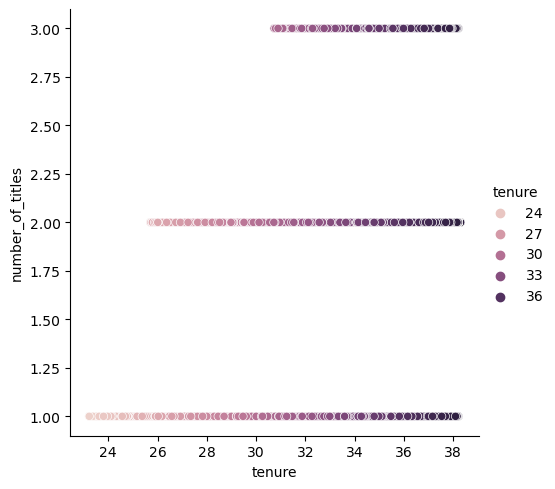

In [237]:
sns.relplot(data=e_df2, x='tenure', y='number_of_titles', hue='tenure')
plt.show()

In [253]:
stats.levene(e_df2.tenure, e_df2.number_of_titles)

LeveneResult(statistic=393013.17964966845, pvalue=0.0)

In [255]:
e_df2.number_of_titles.value_counts()

1    159754
2    137256
3      3014
Name: number_of_titles, dtype: int64

In [256]:
#variances are huge so we use the kruskal wallis test

𝐻𝑜
 : the median is the same for the various number of titles

𝐻𝑎
 : the median is not the same for the various number of titles

In [257]:
stats.kruskal(e_df2.number_of_titles,e_df2.tenure)

KruskalResult(statistic=464355.8660523541, pvalue=0.0)

In [238]:
r,p = stats.pearsonr(e_df2.tenure, e_df2.number_of_titles)
r, p

(0.266598625722004, 0.0)

In [239]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Use the sleepstudy data.

Is there a relationship between days and reaction time?

In [241]:
from pydataset import data

 $H_o$: there is no linear relationship between days and reaction
 
 $H_a$: there is a linear relationship between days and reaction

In [243]:
sleep = data('sleepstudy')
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


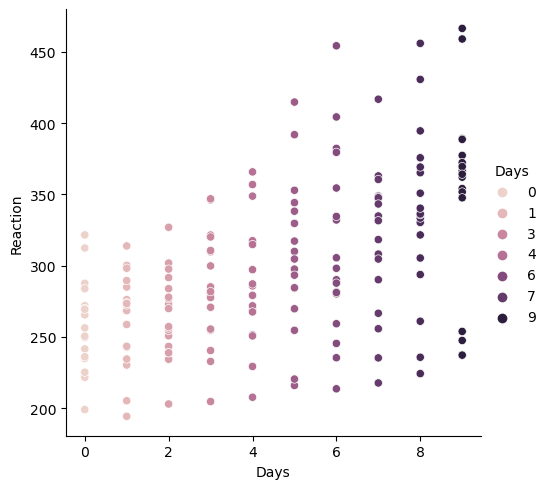

In [244]:
sns.relplot(data=sleep, x='Days', y='Reaction', hue='Days')
plt.show()

In [245]:
r,p = stats.pearsonr(sleep.Days, sleep.Reaction)
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [246]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis
